In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
base = pd.read_excel("C:/Users/wilme/Documents/Maestria/Proyecto Capstone/base_eventos.xlsx")
base.head()

,FECHA DEL EVENTO,AÑO,MES,PROVINCIA,CODIFICACION PROVINCIAL,EVENTO,CAUSA,CATEGORIA DEL EVENTO,CALIFICACION EVENTO PELIGROSO,NUM EVENTOS
0,2010-01-07,2010,1,Tungurahua,18,ACTIVIDAD VOLCÁNICA,PROCESO ERUPTIVO,NATURAL,Nivel 1,1
1,2010-01-08,2010,1,Galápagos,20,TORMENTA ELÉCTRICA,CONDICIONES ATMOSFÉRICAS,ÉPOCA LLUVIOSA,Nivel 1,2
2,2010-01-20,2010,1,Esmeraldas,8,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 2,1
3,2010-02-06,2010,2,Manabí,13,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1
4,2010-02-06,2010,2,Santo Domingo De Los Tsáchilas,23,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1


In [3]:
year_to_remove = 2023  # Año que quieres eliminar
data = base[base['AÑO'] != year_to_remove]

provincia_seleccionada = 'Pichincha'
data1 = data[data['PROVINCIA'] == provincia_seleccionada]

# Convertir la columna 'FECHA DEL EVENTO' a datetime
data1['FECHA DEL EVENTO'] = pd.to_datetime(data1['FECHA DEL EVENTO'])

# Crear una columna 'AÑO_MES' para agrupar por año y mes
data1['AÑO_MES'] = data1['FECHA DEL EVENTO'].dt.to_period('M')

# Agrupar los datos por 'AÑO_MES' y contar el número de eventos en cada mes
events_per_month = data1.groupby('AÑO_MES').size()

# Mostrar las primeras filas de la serie temporal resultante
events_per_month


C:\Users\wilme\AppData\Local\Temp\ipykernel_12484\1130842398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FECHA DEL EVENTO'] = pd.to_datetime(data1['FECHA DEL EVENTO'])
C:\Users\wilme\AppData\Local\Temp\ipykernel_12484\1130842398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['AÑO_MES'] = data1['FECHA DEL EVENTO'].dt.to_period('M')


AÑO_MES
2010-04     7
2010-05     2
2010-06     4
2010-07     7
2010-08     9
           ..
2022-08    37
2022-09    46
2022-10    37
2022-11    37
2022-12    36
Freq: M, Length: 152, dtype: int64

In [4]:
from statsmodels.tsa.stattools import adfuller
# Realizar la prueba de Dickey-Fuller aumentada para verificar la estacionariedad
adf_test_events = adfuller(events_per_month)

# Interpretar los resultados de la prueba de Dickey-Fuller
print(f'ADF Statistic: {adf_test_events[0]}')
print(f'p-value: {adf_test_events[1]}')
for key, value in adf_test_events[4].items():
    print(f'Critical Values {key}: {value}')

# Si el p-value es menor que 0.05, podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria (es no estacionaria).


ADF Statistic: -1.7392110416928526
p-value: 0.4110313448429893
Critical Values 1%: -3.4756368462466662
Critical Values 5%: -2.8814104466172608
Critical Values 10%: -2.5773652982553568


In [10]:
events_per_month_diff=events_per_month.diff(1).bfill()

In [11]:
adf_test_events_diff = adfuller(events_per_month_diff)

# Interpretar los resultados de la prueba de Dickey-Fuller
print(f'ADF Statistic: {adf_test_events_diff[0]}')
print(f'p-value: {adf_test_events_diff[1]}')
for key, value in adf_test_events_diff[4].items():
    print(f'Critical Values {key}: {value}')

ADF Statistic: -11.04362385552256
p-value: 5.2898180798670087e-20
Critical Values 1%: -3.4753253063120644
Critical Values 5%: -2.881274703275226
Critical Values 10%: -2.5772928360116873


<Figure size 1200x600 with 0 Axes>

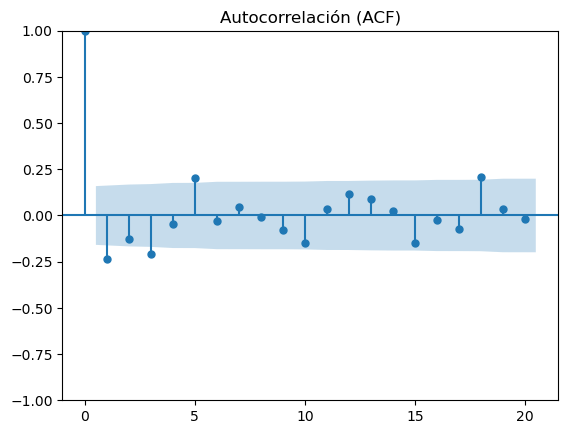

<Figure size 1200x600 with 0 Axes>

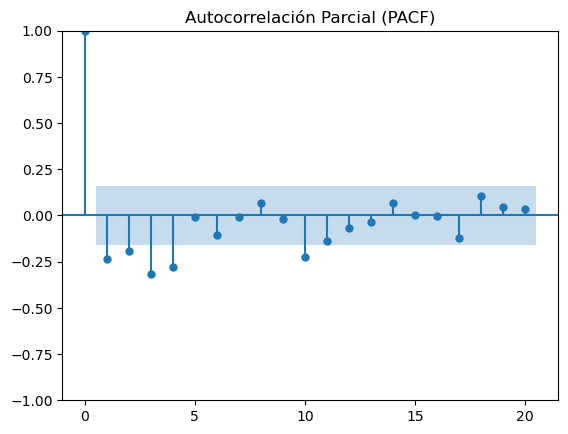

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Graficar la función de autocorrelación (ACF)
plt.figure(figsize=(12, 6))
plot_acf(events_per_month_diff, lags=20, alpha=0.05)
plt.title('Autocorrelación (ACF)')
plt.show()

# Graficar la función de autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(events_per_month_diff, lags=20, alpha=0.05)
plt.title('Autocorrelación Parcial (PACF)')
plt.show()

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo ARIMA con los parámetros identificados
model_arima_events = ARIMA(events_per_month, order=(4, 1, 0))
results_arima_events = model_arima_events.fit()

# Mostrar el resumen del modelo ARIMA ajustado
results_arima_events.summary()

C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -545.498
Date:                Sat, 24 Feb 2024   AIC                           1100.997
Time:                        18:06:39   BIC                           1116.083
Sample:                             0   HQIC                          1107.126
                                - 152                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4274      0.078     -5.449      0.000      -0.581      -0.274
ar.L2         -0.3584      0.077     -4.648      0.000      -0.509      -0.207
ar.L3         -0.4047      0.087     -4.670      0.000      -0.575      -0.235
ar.L4         -0.2703      0.098     -2.753      0.006      -0.463      -0.078
sigma2        80.0244      8.065      9.923      0.000      64.217      95.831
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                22.94
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.46
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

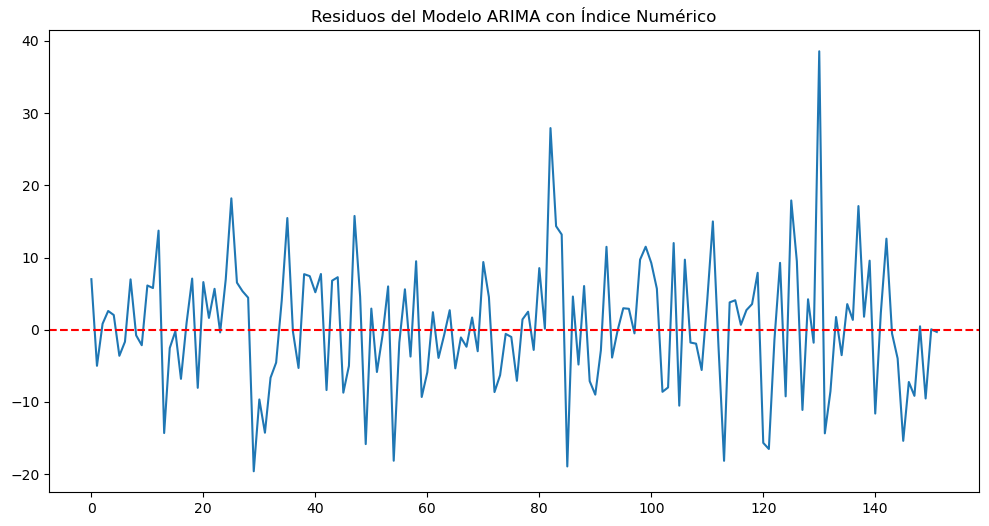

<Figure size 1200x600 with 0 Axes>

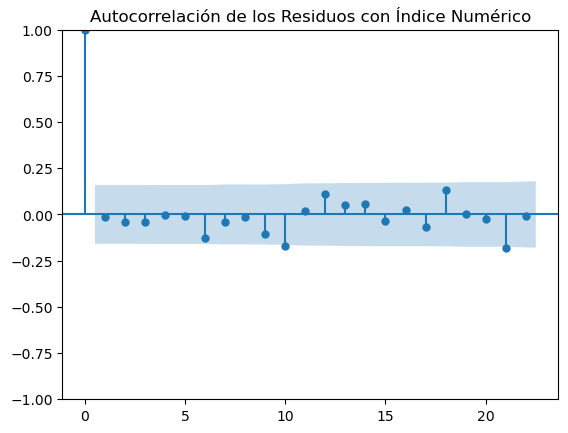

In [40]:
# Reindexar la serie de residuos con un rango numérico para facilitar la visualización
residuals = results_arima_events.resid
residuals_indexed = residuals.reset_index(drop=True)

# Gráfico de los residuos con índice numérico
plt.figure(figsize=(12, 6))
plt.plot(residuals_indexed)
plt.title('Residuos del Modelo ARIMA con Índice Numérico')
plt.axhline(0, linestyle='--', color='red')
plt.show()

# Función de autocorrelación de los residuos con índice numérico
plt.figure(figsize=(12, 6))
plot_acf(residuals_indexed, alpha=0.05)
plt.title('Autocorrelación de los Residuos con Índice Numérico')
plt.show()


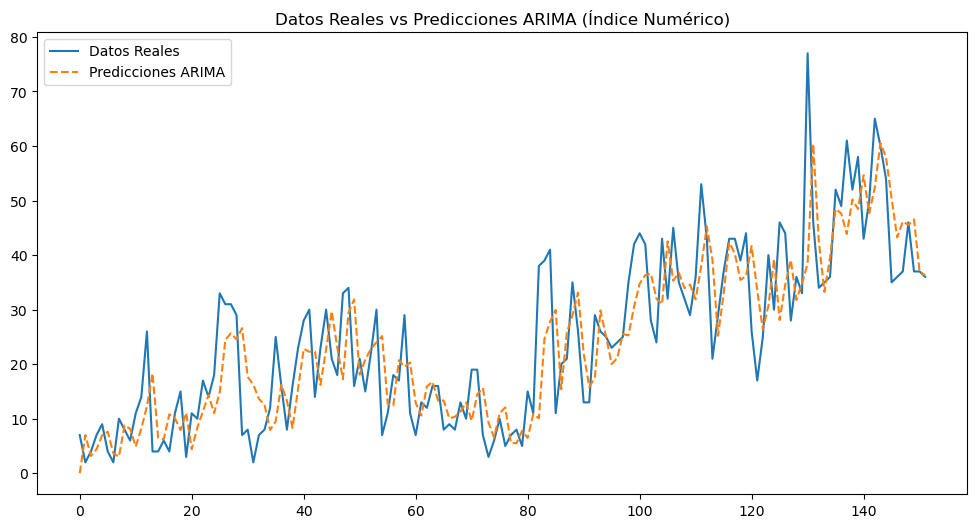

In [41]:
# Convertir el índice de 'events_per_month' y 'predictions' a un rango numérico para la visualización
events_per_month_indexed = events_per_month.reset_index(drop=True)
predictions = results_arima_events.predict(start=events_per_month.index[0], end=events_per_month.index[-1])
predictions_indexed = predictions.reset_index(drop=True)

# Gráfico de los datos reales vs las predicciones con índice numérico
plt.figure(figsize=(12, 6))
plt.plot(events_per_month_indexed, label='Datos Reales')
plt.plot(predictions_indexed, label='Predicciones ARIMA', linestyle='--')
plt.title('Datos Reales vs Predicciones ARIMA (Índice Numérico)')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (23,) and (24,)

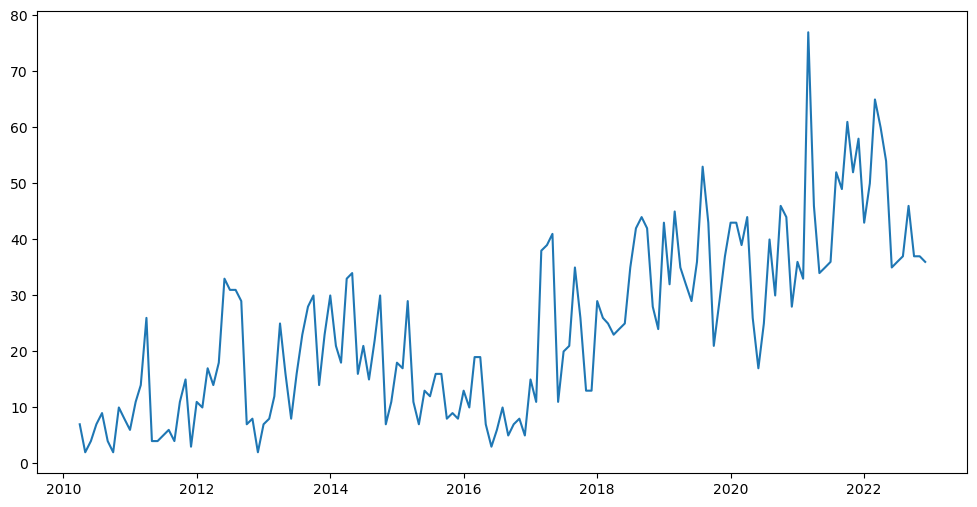

In [9]:
#import pandas as pd
#
## Suponiendo que 'events_per_month' es tu serie temporal
## Convertir el índice de PeriodIndex a DateTimeIndex si aún no se ha hecho
#events_per_month.index = events_per_month.index.to_timestamp()
#
## Ajustar el modelo ARIMA como antes
#from statsmodels.tsa.arima.model import ARIMA
#
## Asumiendo que ya tienes el modelo ajustado, continuamos desde la generación de predicciones
#n_periods = 24  # Número de periodos que quieres predecir hacia el futuro
#
## Generar fechas futuras para las predicciones
#start = events_per_month.index[-1] + pd.DateOffset(months=1)
#end = start + pd.DateOffset(months=n_periods - 1)
#
## Generar predicciones futuras
#forecast = results_arima_events.get_forecast(steps=n_periods)
#
## Obtener el pronóstico y los intervalos de confianza
#forecast_pred = forecast.predicted_mean
#forecast_conf_int = forecast.conf_int()
#
## Para graficar, asegúrate de que las fechas de las predicciones sean compatibles
#pred_dates = pd.date_range(start=start, end=end, freq='M')
#
## Visualizar las predicciones y los intervalos de confianza
#plt.figure(figsize=(12, 6))
#plt.plot(events_per_month.index, events_per_month, label='Datos Históricos')
#plt.plot(pred_dates, forecast_pred, label='Predicciones Futuras', color='red')
#plt.fill_between(pred_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
#plt.title('Predicciones Futuras de Eventos Peligrosos')
#plt.legend()
#plt.show()


In [42]:
# Acceder a los valores predichos y convertirlos a un array de NumPy
forecast_values = forecast_pred.to_numpy()

# Acceder a los intervalos de confianza y convertirlos también a arrays de NumPy
lower_bounds = forecast_conf_int.iloc[:, 0].to_numpy()
upper_bounds = forecast_conf_int.iloc[:, 1].to_numpy()

# Mostrar los valores predichos y los intervalos de confianza
print("Valores Predichos:", forecast_values)
print("Intervalos de Confianza - Límite Inferior:", lower_bounds)
print("Intervalos de Confianza - Límite Superior:", upper_bounds)


Valores Predichos: [33.47831118 31.50393487 29.95808124 28.74774284 27.80009876 27.0581333
 26.47720554 26.02236353 25.66624136 25.38741267 25.16910154 24.99817309
 24.86434331 24.75956022 24.67751947 24.613285   24.56299212 24.52361491
 24.49278421 24.46864506 24.44974513 24.43494728 24.42336118 24.41428975]
Intervalos de Confianza - Límite Inferior: [14.43090252  7.31280234  3.09636861  0.37290153 -1.46366899 -2.73745788
 -3.63976295 -4.28993213 -4.76517452 -5.11679668 -5.37964614 -5.57784553
 -5.72838102 -5.84340059 -5.93171485 -5.99979447 -6.0524443  -6.09326628
 -6.12498262 -6.14966467 -6.16889741 -6.18389928 -6.19561045 -6.20475854]
Intervalos de Confianza - Límite Superior: [52.52571985 55.6950674  56.81979386 57.12258414 57.06386651 56.85372448
 56.59417402 56.33465918 56.09765724 55.89162202 55.71784921 55.57419172
 55.45706765 55.36252103 55.28675378 55.22636448 55.17842854 55.14049609
 55.11055103 55.0869548  55.06838767 55.05379384 55.04233281 55.03333805]


In [44]:
import pandas as pd

# Asumiendo que 'pred_dates' es un array de fechas de tus predicciones futuras
# y que ya tienes 'forecast_values', 'lower_bounds', y 'upper_bounds'
pred_dates = pd.date_range(start=events_per_month.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')

# Crear un DataFrame para contener los periodos, las predicciones y los intervalos de confianza
forecast_df = pd.DataFrame({
    'Fecha': pred_dates,
    'Predicción': forecast_values,
    'Límite Inferior': lower_bounds,
    'Límite Superior': upper_bounds
})

# Establecer la fecha como el índice del DataFrame si lo prefieres
forecast_df.set_index('Fecha', inplace=True)

# Mostrar el DataFrame resultante
print(forecast_df)


            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-01-31   33.478311        14.430903        52.525720
2023-02-28   31.503935         7.312802        55.695067
2023-03-31   29.958081         3.096369        56.819794
2023-04-30   28.747743         0.372902        57.122584
2023-05-31   27.800099        -1.463669        57.063867
2023-06-30   27.058133        -2.737458        56.853724
2023-07-31   26.477206        -3.639763        56.594174
2023-08-31   26.022364        -4.289932        56.334659
2023-09-30   25.666241        -4.765175        56.097657
2023-10-31   25.387413        -5.116797        55.891622
2023-11-30   25.169102        -5.379646        55.717849
2023-12-31   24.998173        -5.577846        55.574192
2024-01-31   24.864343        -5.728381        55.457068
2024-02-29   24.759560        -5.843401        55.362521
2024-03-31   24.677519        -5.931715        55.286754
2024-04-30   24.613285        -

In [45]:
# Asegurarse de que el índice sea de tipo DateTimeIndex
# Si 'Fecha' no es el índice, primero convertirlo a índice y asegurarse de que es de tipo DateTime
if not isinstance(forecast_df.index, pd.DatetimeIndex):
    forecast_df.set_index('Fecha', inplace=True)

# Convertir el índice a DateTimeIndex si aún no lo es
forecast_df.index = pd.to_datetime(forecast_df.index)

# Agrupar por año y sumar las predicciones y límites para cada año
summed_forecast_by_year = forecast_df.resample('Y').sum()
summed_forecast_by_year_int = summed_forecast_by_year.astype(int) 
summed_forecast_by_year_rounded = summed_forecast_by_year.round()

# Mostrar el resultado
print(summed_forecast_by_year)
print(summed_forecast_by_year_int)
print(summed_forecast_by_year_rounded)


            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31  332.266800        -7.757310        672.29091
2024-12-31  294.685088       -72.676814        662.04699
            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31         332               -7              672
2024-12-31         294              -72              662
            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31       332.0             -8.0            672.0
2024-12-31       295.0            -73.0            662.0
